<a href="https://colab.research.google.com/github/Gibber17/Mortality-Rates-In-Races/blob/main/Maternal_Mortality_Rates_in_the_U_S_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Upload and import all data sets**

In [ ]:
# Import all datasets
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [ ]:
# upload first data
from google.colab import files
uploaded = files.upload()

Saving MortalityRaceData - MortalityRaceData (1).csv to MortalityRaceData - MortalityRaceData (1).csv


In [ ]:
import io
mortality_races = pd.read_csv(io.BytesIO(uploaded['MortalityRaceData - MortalityRaceData (1).csv']))

In [ ]:
# upload second data
from google.colab import files
uploaded = files.upload()

Saving MortalityAgeData - MortalityAgeData.csv to MortalityAgeData - MortalityAgeData.csv


In [ ]:
import io
mortality_age = pd.read_csv(io.BytesIO(uploaded['MortalityAgeData - MortalityAgeData.csv']))

In [ ]:
# upload third data
from google.colab import files
uploaded = files.upload()

Saving MortalityYearsData - MortalityYearsData.csv to MortalityYearsData - MortalityYearsData.csv


In [ ]:
import io
mortality_years = pd.read_csv(io.BytesIO(uploaded['MortalityYearsData - MortalityYearsData.csv']))

# **Cleaning the races data set.**

In [ ]:
mortality_races.head()

,Year,Race and Hispanic origin and age,Number of deaths,Maternal mortality rate
0,2018,"Asian, non-Hispanic",32,13.3
1,2018,"Black, non-Hispanic",206,37.3
2,2018,"White, non-Hispanic",291,14.9
3,2018,Hispanic,105,11.8
4,2019,"Asian, non-Hispanic",33,13.8


In [ ]:
mortality_races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              20 non-null     int64  
 1   Race and Hispanic origin and age  20 non-null     object 
 2   Number of deaths                  20 non-null     int64  
 3   Maternal mortality rate           20 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 768.0+ bytes


In [ ]:
mortality_races.rename(columns = {'Race and Hispanic origin and age':'Race and Hispanic origin'}, inplace = True)


In [ ]:
mortality_races.head()

,Year,Race and Hispanic origin,Number of deaths,Maternal mortality rate
0,2018,"Asian, non-Hispanic",32,13.3
1,2018,"Black, non-Hispanic",206,37.3
2,2018,"White, non-Hispanic",291,14.9
3,2018,Hispanic,105,11.8
4,2019,"Asian, non-Hispanic",33,13.8


In [ ]:
mortality_races.describe()

,Year,Number of deaths,Maternal mortality rate
count,20.000000,20.000000,20.000000
mean,2020.000000,206.600000,25.520000
std,1.450953,139.448311,16.773996
min,2018.000000,27.000000,11.800000
25%,2019.000000,87.750000,13.675000
50%,2020.000000,223.500000,18.050000
75%,2021.000000,305.500000,30.325000
max,2022.000000,503.000000,69.900000


In [ ]:
mortality_races.duplicated().sum()

0

In [ ]:
mortality_races.isna().sum()

,0
Year,0
Race and Hispanic origin,0
Number of deaths,0
Maternal mortality rate,0


# **Cleaning the age data set**

In [ ]:
mortality_age.head()

,Year,Age,Number of Deaths,Maternal Mortality Rate
0,2018,Younger than 25,96,10.6
1,2018,25-39,458,16.6
2,2018,40 and older,104,81.9
3,2019,Younger than 25,111,12.6
4,2019,25-39,544,19.9


In [ ]:
mortality_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     15 non-null     int64  
 1   Age                      15 non-null     object 
 2   Number of Deaths         15 non-null     int64  
 3   Maternal Mortality Rate  15 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 608.0+ bytes


In [ ]:
mortality_age.describe()

,Year,Number of Deaths,Maternal Mortality Rate
count,15.00000,15.000000,15.000000
mean,2020.00000,286.266667,44.960000
std,1.46385,249.775747,41.575487
min,2018.00000,96.000000,10.600000
25%,2019.00000,112.000000,15.500000
50%,2020.00000,140.000000,21.100000
75%,2021.00000,501.000000,78.700000
max,2022.00000,854.000000,138.500000


# **Cleaning years data set**

In [ ]:
mortality_years.head()

,Year,Number of deaths,Maternal mortality rate
0,2018,658,17.4
1,2019,754,20.1
2,2020,861,23.8
3,2021,"1,205",32.9
4,2022,817,22.3


In [ ]:
mortality_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     5 non-null      int64  
 1   Number of deaths         5 non-null      object 
 2   Maternal mortality rate  5 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 248.0+ bytes


In [ ]:
mortality_years['Number of deaths'] = mortality_years['Number of deaths'].str.replace(',', '')

In [ ]:
mortality_years['Number of deaths'] = mortality_years['Number of deaths'].astype(int)

In [ ]:
mortality_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     5 non-null      int64  
 1   Number of deaths         5 non-null      int64  
 2   Maternal mortality rate  5 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 248.0 bytes


In [ ]:
mortality_years.describe()

,Year,Number of deaths,Maternal mortality rate
count,5.000000,5.000000,5.000000
mean,2020.000000,859.000000,23.300000
std,1.581139,207.912241,5.883451
min,2018.000000,658.000000,17.400000
25%,2019.000000,754.000000,20.100000
50%,2020.000000,817.000000,22.300000
75%,2021.000000,861.000000,23.800000
max,2022.000000,1205.000000,32.900000


# **Create graphs for race data set**

In [ ]:
mortality_races.corr(numeric_only=True)

,Year,Number of deaths,Maternal mortality rate
Year,1.000000,0.190411,0.206735
Number of deaths,0.190411,1.000000,0.482385
Maternal mortality rate,0.206735,0.482385,1.000000


<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

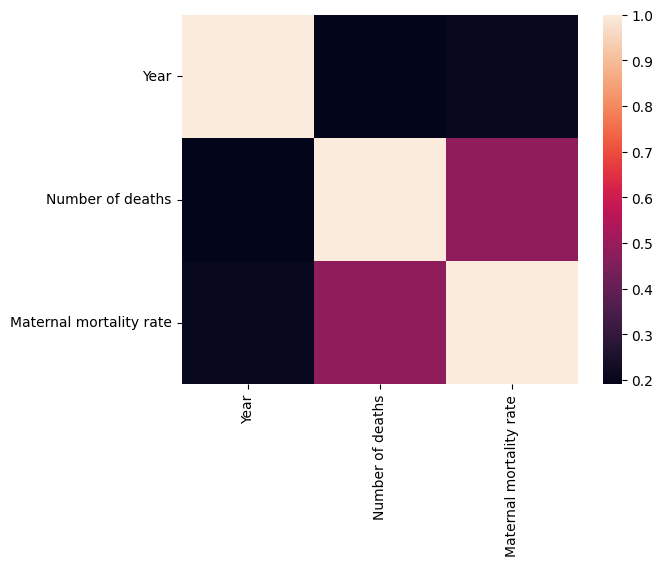

In [ ]:
import seaborn as sns
sns.heatmap(mortality_races.corr(numeric_only=True))
sns.heatmap

In [ ]:
mortality_races.head()

,Year,Race and Hispanic origin,Number of deaths,Maternal mortality rate
0,2018,"Asian, non-Hispanic",32,13.3
1,2018,"Black, non-Hispanic",206,37.3
2,2018,"White, non-Hispanic",291,14.9
3,2018,Hispanic,105,11.8
4,2019,"Asian, non-Hispanic",33,13.8


In [ ]:
pip install mpld3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 1.5 MB/s eta 0:00:00


In [ ]:
import mpld3

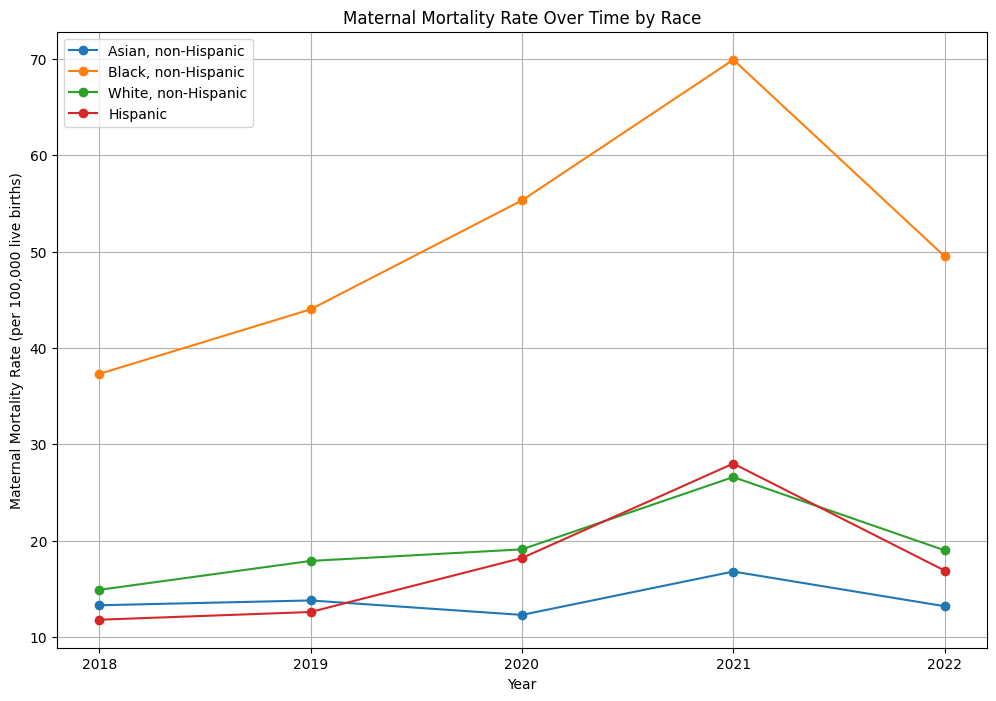

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import mpld3
from IPython.display import HTML


# Extract unique race groups from the 'Race and Hispanic origin' column
race_groups = mortality_races['Race and Hispanic origin'].unique()

# Extract unique years from the 'Year' column and sort them in ascending order
years = sorted(mortality_races['Year'].unique())

# Create a new figure for the plot with a specified size
fig, ax = plt.subplots(figsize=(12, 8))

# Loop over each unique race group
for race_group in race_groups:
    # Filter the dataset to include only rows that match the current race group
    group_data = mortality_races[mortality_races['Race and Hispanic origin'] == race_group]

    # Plot the maternal mortality rate for the current race group over the years
    ax.plot(group_data['Year'], group_data['Maternal mortality rate'], marker='o', linestyle='-', label=race_group)

# Set the title of the plot
ax.set_title('Maternal Mortality Rate Over Time by Race')

# Set the label for the x-axis
ax.set_xlabel('Year')

# Set the label for the y-axis
ax.set_ylabel('Maternal Mortality Rate (per 100,000 live births)')

# Enable grid lines on the plot for better readability
ax.grid(True)

# Set the x-axis ticks to be the sorted list of unique years
# Set the x-axis ticks to be the sorted list of unique years and format them as integers
ax.set_xticks(years)
ax.set_xticklabels([str(year) for year in years])
# Display the legend on the plot to show which line corresponds to which race group
ax.legend()

# Convert the plot to HTML using mpld3
html_plot = mpld3.fig_to_html(fig)

# Optionally, display the HTML plot in a Jupyter notebook
HTML(html_plot)

# Save the HTML string to a file
with open('plot.html', 'w') as f:
    f.write(html_plot)

# Show the plot
plt.show()


# **Create graphs for age data set**

In [ ]:
mortality_age.corr(numeric_only=True)

,Year,Number of Deaths,Maternal Mortality Rate
Year,1.000000,0.150424,0.128162
Number of Deaths,0.150424,1.000000,-0.308750
Maternal Mortality Rate,0.128162,-0.308750,1.000000


<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

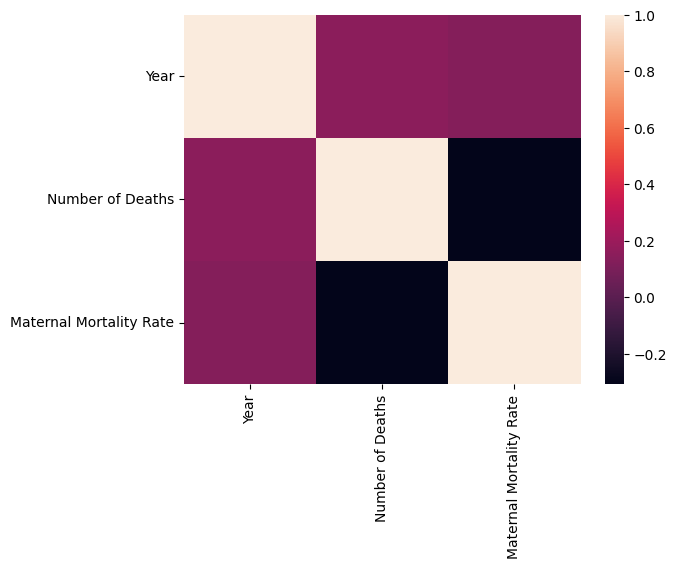

In [ ]:
import seaborn as sns
sns.heatmap(mortality_age.corr(numeric_only=True))
sns.heatmap

In [ ]:
mortality_age.head()

,Year,Age,Number of Deaths,Maternal Mortality Rate
0,2018,Younger than 25,96,10.6
1,2018,25-39,458,16.6
2,2018,40 and older,104,81.9
3,2019,Younger than 25,111,12.6
4,2019,25-39,544,19.9


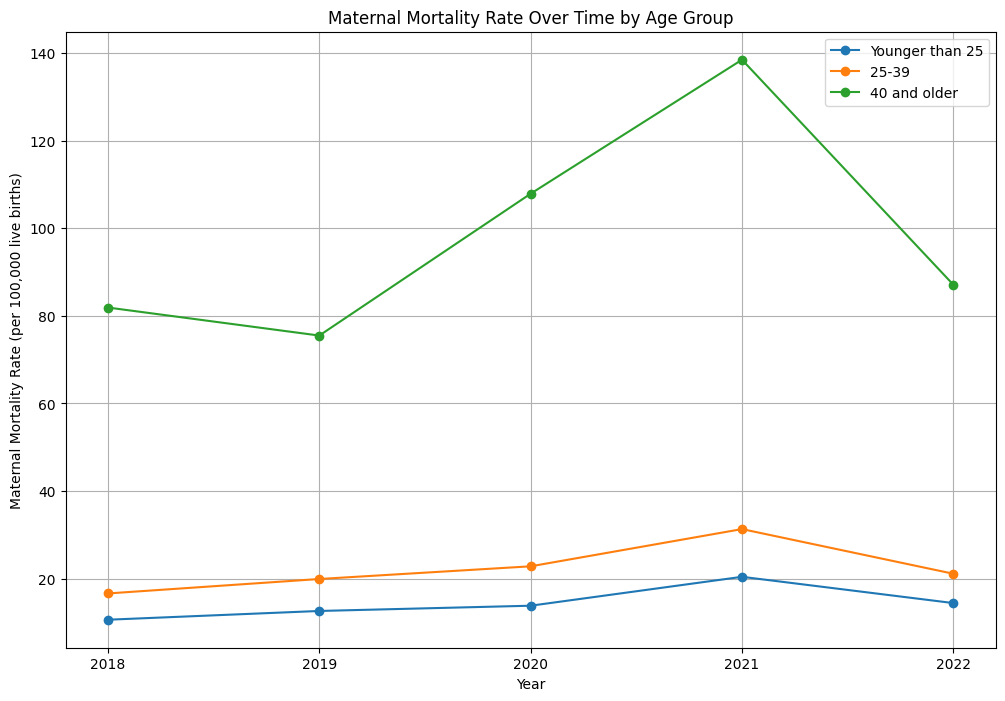

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract unique age groups from the 'Age' column
age_groups = mortality_age['Age'].unique()

# Extract unique years from the 'Year' column and sort them in ascending order
years = sorted(mortality_age['Year'].unique())

# Create a new figure for the plot with a specified size
plt.figure(figsize=(12, 8))

# Loop over each unique age group
for age_group in age_groups:
    # Filter the dataset to include only rows that match the current age group
    group_data = mortality_age[mortality_age['Age'] == age_group]

    # Plot the maternal mortality rate for the current age group over the years
    # - 'Year' on the x-axis
    # - 'Maternal Mortality Rate' on the y-axis
    # - marker='o' to use circle markers for each data point
    # - linestyle='-' to connect the data points with lines
    # - label=age_group to label the line with the current age group for the legend
    plt.plot(group_data['Year'], group_data['Maternal Mortality Rate'], marker='o', linestyle='-', label=age_group)

# Set the title of the plot
plt.title('Maternal Mortality Rate Over Time by Age Group')

# Set the label for the x-axis
plt.xlabel('Year')

# Set the label for the y-axis
plt.ylabel('Maternal Mortality Rate (per 100,000 live births)')

# Enable grid lines on the plot for better readability
plt.grid(True)

# Set the x-axis ticks to be the sorted list of unique years
plt.xticks(years)

# Display the legend on the plot to show which line corresponds to which age group
plt.legend()

# Display the plot
plt.show()


# **Create graphs for years data set**

In [ ]:
mortality_years.corr(numeric_only=True)

,Year,Number of deaths,Maternal mortality rate
Year,1.000000,0.584812,0.607360
Number of deaths,0.584812,1.000000,0.998678
Maternal mortality rate,0.607360,0.998678,1.000000


<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

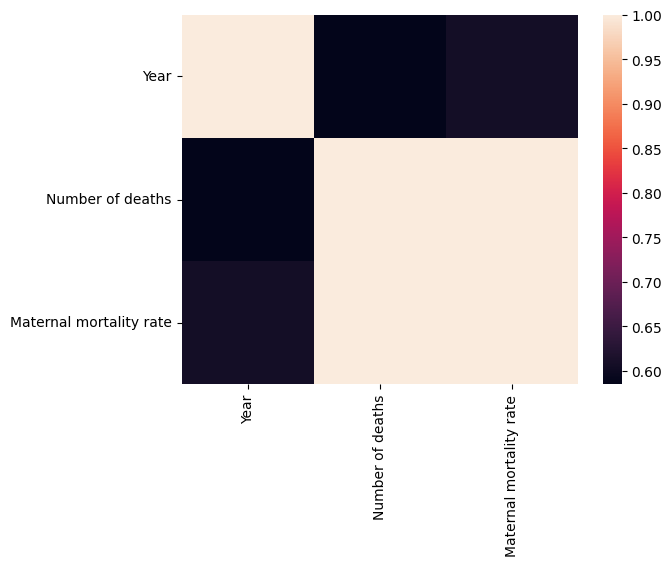

In [ ]:
import seaborn as sns
sns.heatmap(mortality_years.corr(numeric_only=True))
sns.heatmap

In [ ]:
mortality_years.head()

,Year,Number of deaths,Maternal mortality rate
0,2018,658,17.4
1,2019,754,20.1
2,2020,861,23.8
3,2021,1205,32.9
4,2022,817,22.3


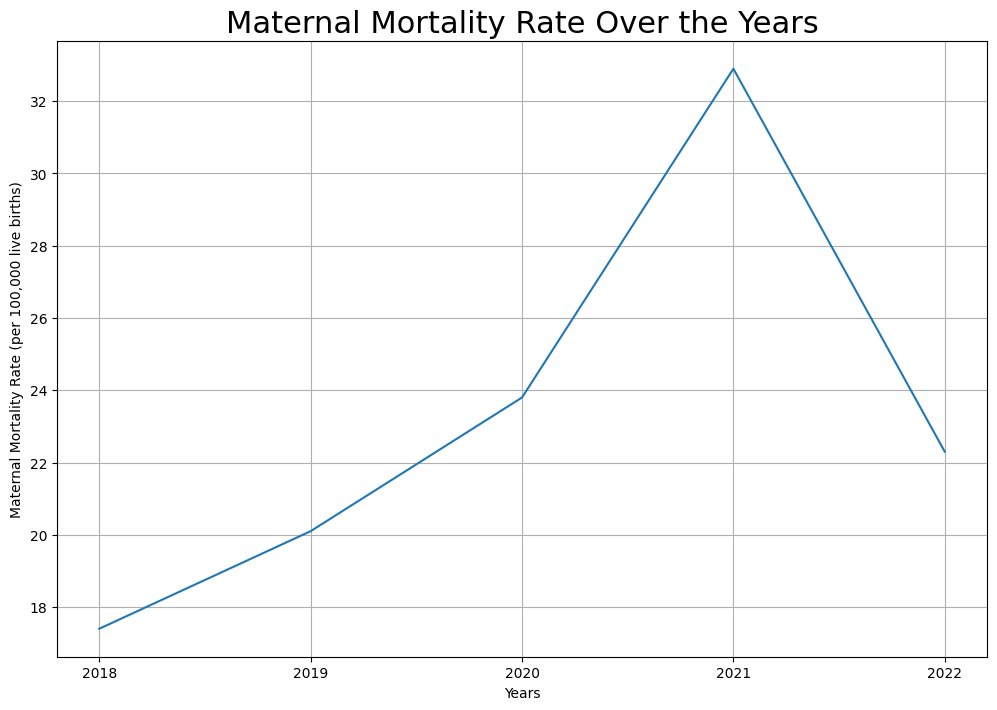

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 8)

plt.figure()
plt.plot(mortality_years['Year'], mortality_years['Maternal mortality rate'])
plt.xlabel('Years')
plt.ylabel('Maternal Mortality Rate (per 100,000 live births)')
plt.title('Maternal Mortality Rate Over the Years', fontsize = 22)
plt.grid(True)
plt.xticks(years)
plt.show()
